In [3]:
# Import some libraries
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt

In [4]:
# Load the Preprocessed data
df_preprocessed = pds.read_csv('../../dataset/global_CO2_emissions/global_CO2_emmissions_preprocessed.csv')
df_preprocessed.head()

,Indicator_CO2 emissions,Indicator_CO2 emissions intensities,Indicator_CO2 emissions multipliers,Country_Argentina,Country_Australia,Country_Austria,Country_Belgium,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
0,1,0,0,1,0,0,0,0,0,0,...,0.284,0.319,0.338,0.377,0.378,0.369,0.371,0.303,0.358,0.344
1,1,0,0,1,0,0,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1,0,0,1,0,0,0,0,0,0,...,0.725,0.738,0.765,0.777,0.840,0.794,0.852,0.789,0.846,0.857
3,1,0,0,1,0,0,0,0,0,0,...,13.804,14.110,14.616,14.120,15.358,13.728,14.273,13.838,14.121,13.067
4,1,0,0,1,0,0,0,0,0,0,...,2.648,2.989,3.094,3.129,3.327,3.323,3.345,3.435,3.564,3.584


In [21]:
# Split the data into training and testing sets
train_size = int(len(df_preprocessed) * 0.8)
train, test = df_preprocessed.iloc[:train_size], df_preprocessed.iloc[train_size:]

print('Train size: ', train_size)
print('Train set: ', train.shape)
print('Test set: ', test.shape)

Train size:  7128
Train set:  (7128, 108)
Test set:  (1782, 108)


##### DATA TRIPPING - to X and y

In [22]:
#Separate target from predictors
# X_temp, y_temp = train.numpy().iloc[:, :-1], train.numpy().iloc[:, -1:]
# Alternatively, 
X_temp, y_temp = pds.DataFrame(train.drop(['F2018'],axis=1)), train.F2018.values.astype(object)
# Get the shape
print('************ Temporal Split ***************')
print('Temporal: ', X_temp.shape, y_temp.shape)

************ Temporal Split ***************
Temporal:  (7128, 107) (7128,)


##### DATA SPLIT- Training and Validation sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.20,random_state=42)

print('************  Training and Validation Split ***************')
print("Train dataset: ", (X_train.shape, y_train.shape)) 
print("Validation dataset: ", (X_test.shape, y_test.shape))

************  Training and Validation Split ***************
Train dataset:  ((5702, 107), (5702,))
Validation dataset:  ((1426, 107), (1426,))


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Reshape the data to be 3D
n_steps = 1  # Number of time steps in each sequence
n_features = train.shape[1]
batch_size=64

X_train, y_train = [], []
for i in range(n_steps, len(train)):
    X_train.append(train[i-n_steps:i])
    y_train.append(train[i])
X_train, y_train = npy.array(X_train), npy.array(y_train)
X_train = npy.reshape(X_train, (X_train.shape[0], n_steps, n_features))

X_test, y_test = [], []
for i in range(n_steps, len(test)):
    X_test.append(test[i-n_steps:i])
    y_test.append(test[i])
X_test, y_test = npy.array(X_test), npy.array(y_test)
X_test = npy.reshape(X_test, (X_test.shape[0], n_steps, n_features))


print("Train set: ", (X_train.shape, y_train.shape)) 
print("test set: ", (X_test.shape, y_test.shape))

Train set:  ((7127, 1, 108), (7127, 108))
test set:  ((1781, 1, 108), (1781, 108))


In [9]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Define the LSTM model - Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) 
# import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

2023-02-28 05:54:12.526085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 05:54:15.231625: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-28 05:54:15.231680: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-28 05:54:21.805454: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [24]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    y_test,
    sequence_length=n_steps,
    sampling_rate=13,
    batch_size=batch_size,
)

dataset_val

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_features))
model.compile(loss='mse', optimizer='adam')


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             44288     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 108)               3564      
                                                                 
Total params: 60,268
Trainable params: 60,268
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
history = model.fit(
                X_train, 
                y_train, 
                epochs=50, 
                batch_size=batch_size, 
                # validation_data=(X_test, y_test), 
                validation_data = dataset_val,
                verbose=2
                )


Epoch 1/50


ValueError: in user code:

    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1, 108), found shape=(None, None, 1, 108)


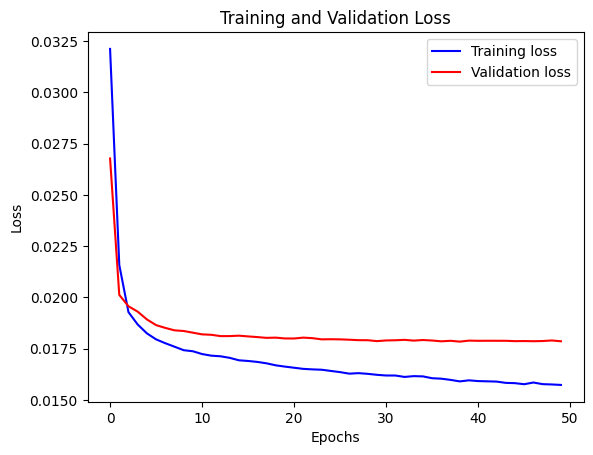

In [ ]:
# Visualize the loss with the function below. After one point, the loss stops decreasing.

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [ ]:
# Make predictions on new data
y_pred = model.predict(X_test)
y_pred

56/56 [==============================] - 0s 1ms/step


array([[ 0.01010087,  0.04377875,  0.94347185, ...,  0.014865  ,
         0.01569322,  0.01455716],
       [ 0.01932895, -0.01173732,  0.9874134 , ...,  0.01419976,
         0.015058  ,  0.01403493],
       [ 0.03179654,  0.00245452,  0.96175694, ...,  0.01536328,
         0.01610685,  0.01490018],
       ...,
       [ 0.02896535,  0.00144464,  0.9655157 , ...,  0.02789949,
         0.02982832,  0.02886997],
       [ 0.02193809,  0.01545268,  0.95875067, ...,  0.02370585,
         0.02536025,  0.024455  ],
       [ 0.0376192 ,  0.01856637,  0.9397404 , ...,  0.01591907,
         0.01672354,  0.01548829]], dtype=float32)

In [ ]:
# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred)
y_pred

array([[ 1.0100871e-02,  4.3778747e-02,  9.4347185e-01, ...,
         7.8531790e+06,  6.7225205e+06,  5.9043140e+06],
       [ 1.9328952e-02, -1.1737317e-02,  9.8741341e-01, ...,
         7.5017290e+06,  6.4504115e+06,  5.6924995e+06],
       [ 3.1796545e-02,  2.4545193e-03,  9.6175694e-01, ...,
         8.1164180e+06,  6.8997080e+06,  6.0434405e+06],
       ...,
       [ 2.8965354e-02,  1.4446378e-03,  9.6551567e-01, ...,
         1.4739297e+07,  1.2777592e+07,  1.1709522e+07],
       [ 2.1938086e-02,  1.5452683e-02,  9.5875067e-01, ...,
         1.2523794e+07,  1.0863596e+07,  9.9188340e+06],
       [ 3.7619203e-02,  1.8566370e-02,  9.3974042e-01, ...,
         8.4100400e+06,  7.1638805e+06,  6.2819750e+06]], dtype=float32)

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )